In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./database.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  object 
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

In [8]:
df.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [9]:
df.set_index("birth_year")

,article_id,full_name,sex,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
birth_year,,,,,,,,,,,,,,,,
-384,308,Aristotle,Male,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
-427,22954,Plato,Male,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
-4,1095706,Jesus Christ,Male,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
-469,25664190,Socrates,Male,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
-356,783,Alexander the Great,Male,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,5891391,Sean St Ledger,Male,Solihull,NaN,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
1990,5322451,Saina Nehwal,Female,Hisar,NaN,India,Asia,29.16670,75.71670,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
1997,33525706,Rūta Meilutytė,Female,Kaunas,NaN,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821


In [10]:
df.sort_values(by=["birth_year"])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
337,9196752,"James, son of Alphaeus",Male,-1,Galilee,NaN,Israel,Asia,32.76000,35.5270,Religious Figure,Religion,Institutions,53,678914,12810,27.4029
105,59172,Judas Iscariot,Male,-1,Other,NaN,Unknown,NaN,NaN,NaN,Religious Figure,Religion,Institutions,63,11142102,176859,28.7693
1307,28018,Simon Magus,Male,-1,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,29,1170101,40348,25.7150
201,6140,Claudius,Male,-10,Lyon,NaN,France,Europe,45.76000,4.8400,Politician,Government,Institutions,71,5783578,81459,27.9662
2372,68601,Agrippa I,Male,-10,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,27,742179,27488,24.8662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,20596,Mieszko II Lambert,Male,990,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,32,866987,27093,24.1020
1360,69402,Guido d'Arezzo,Male,991,Paris,NaN,France,Europe,48.85670,2.3508,Composer,Music,Arts,38,1299635,34201,25.6610
2176,150695,Olaf II of Norway,Male,995,Ringerike,NaN,Norway,Europe,60.20528,10.1525,Politician,Government,Institutions,33,975295,29554,25.0010
1522,23671899,Elisha,Male,Unknown,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,41,1338790,32653,25.5087


In [11]:
# dfex.to_csv(r'./dfex.cv', index=False)

In [12]:
df['birth_year'] = (
    pd.to_numeric(df['birth_year'],
                  errors='coerce')
      .fillna(0)
    )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  float64
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

In [14]:
df.continent.value_counts()

Europe           6368
North America    2439
Asia             1188
Africa            419
Unknown           408
South America     366
Oceania           123
Name: continent, dtype: int64

In [15]:
#There will be multiple eras, in every era, there will be most dominant continent,countries,domains,gender,industries
#avg. popularity index
#which countries are leading in which domains
#influence of domains,continents,countries in overall total historical score and frequency
#can take inspiration from 2 other notebooks written in ggplot and for era analysis on 20th centuary analysis

In [16]:
df.continent.unique()

array(['Europe', 'Asia', 'Africa', nan, 'South America', 'North America',
       'Unknown', 'Oceania'], dtype=object)

# So let's start with a brief view on entire dataset! 

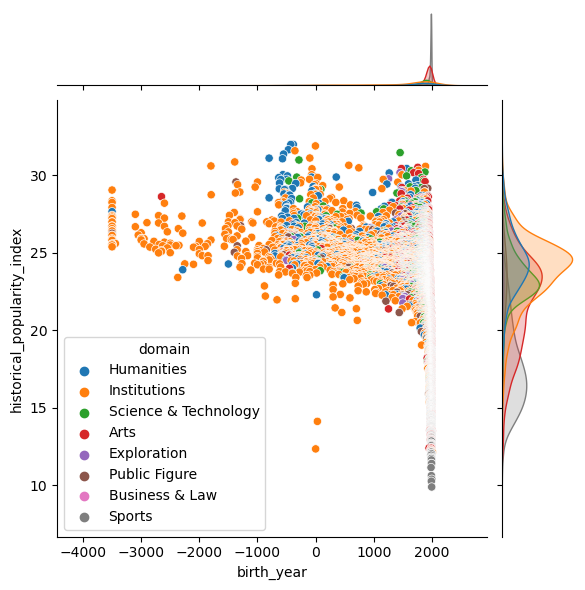

In [17]:
sns.jointplot(x='birth_year', y='historical_popularity_index', data=df, hue="domain")

By looking at the above jointplot, we can observe some relations between popularity index, birth-year and domain. We can clearly see the domination of *Instutitions* domain. Also some domains like sports and Exploration are pretty low in popularity index.Also domains like Public figure came into existance pretty late.
Now, let's see how geometry has affected mankind.

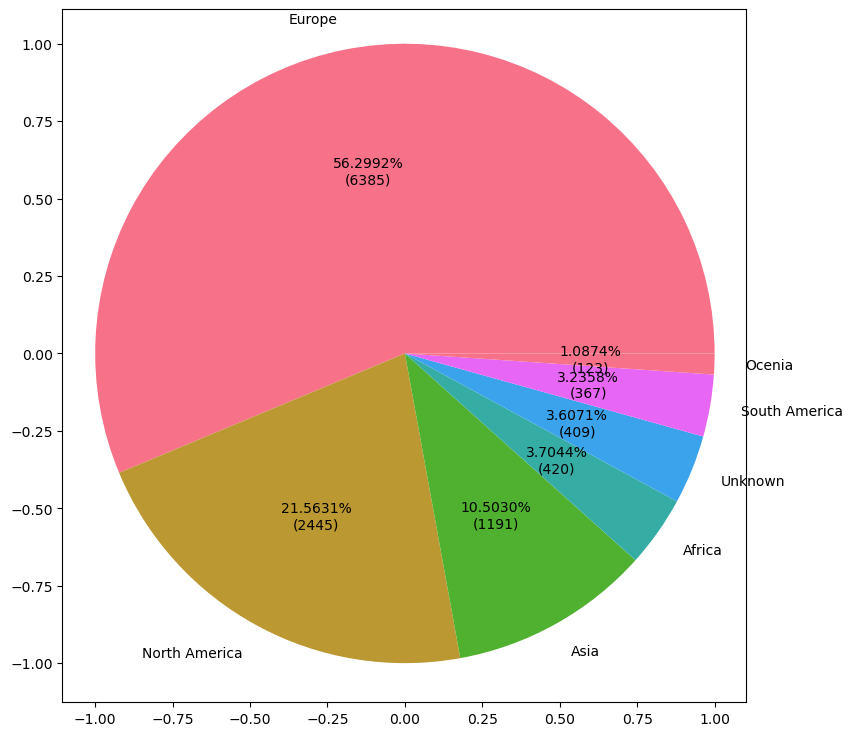

In [18]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, 11341*x/100)

plt.figure(figsize=(14,9))
data = df.continent.value_counts()
labels = ['Europe', 'North America', 'Asia', 'Africa', 'Unknown', 'South America', 'Ocenia']
colors = sns.color_palette('husl')
plt.pie(data, labels=labels,colors = colors, autopct = my_fmt, frame=True)
plt.show()

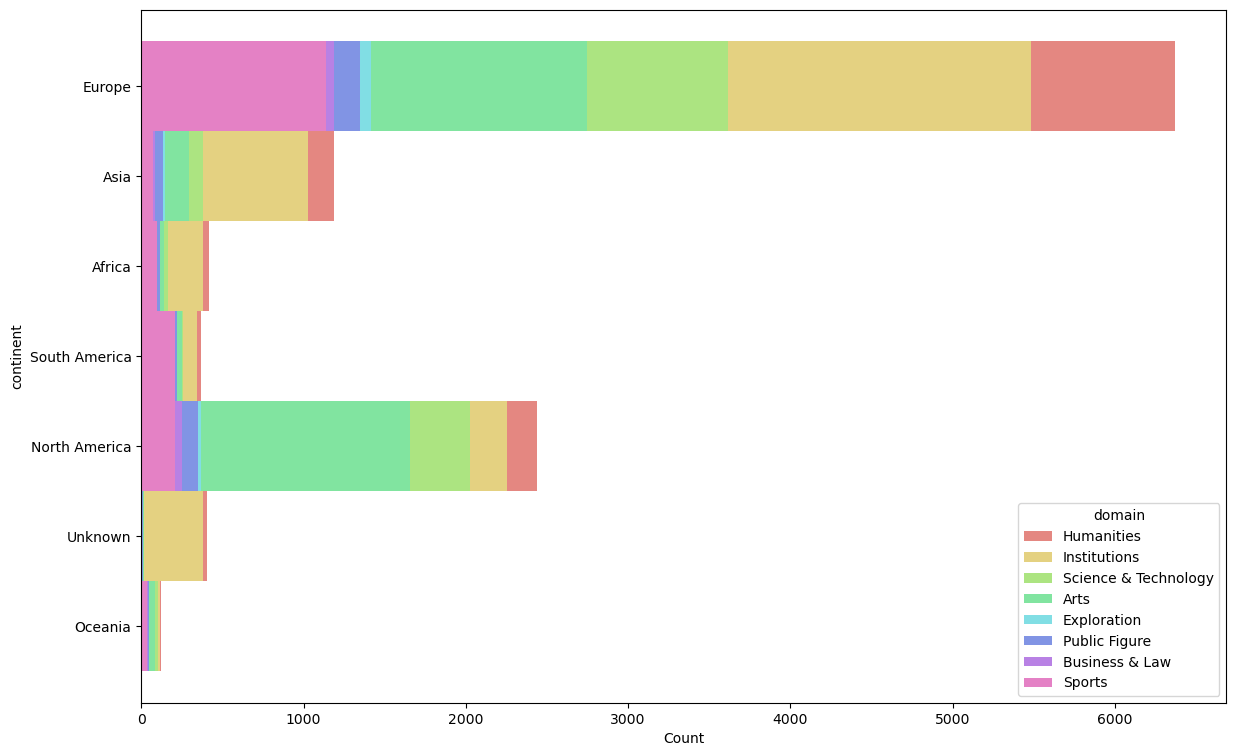

In [19]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

plt.figure(figsize=(14,9))
p = sns.histplot(data = df, y="continent", hue="domain", palette="hls", multiple="stack", linewidth=0,)
# show_values(p, "h", space=0)



Here we can see that continentwise Europe is totally leading, followed by North America and Asia. Ocenia is at last place as it was discovered very late in history. Domainwise we can see that except for North America, every other continent has *Institutions* as most popular domain, while North America has Arts as leading domain. (Arts includes cinema, crafts, and music as well)

Now you after seeing North America at 2nd place, you might be wondering that you have heard of very few American notable history figures. But you do recognise a ton of American celebrities, that means majority of data in dataset should be from last 2-4 centuries, especially of America's.
Let's check it out.

(1000.0, 2000.0)

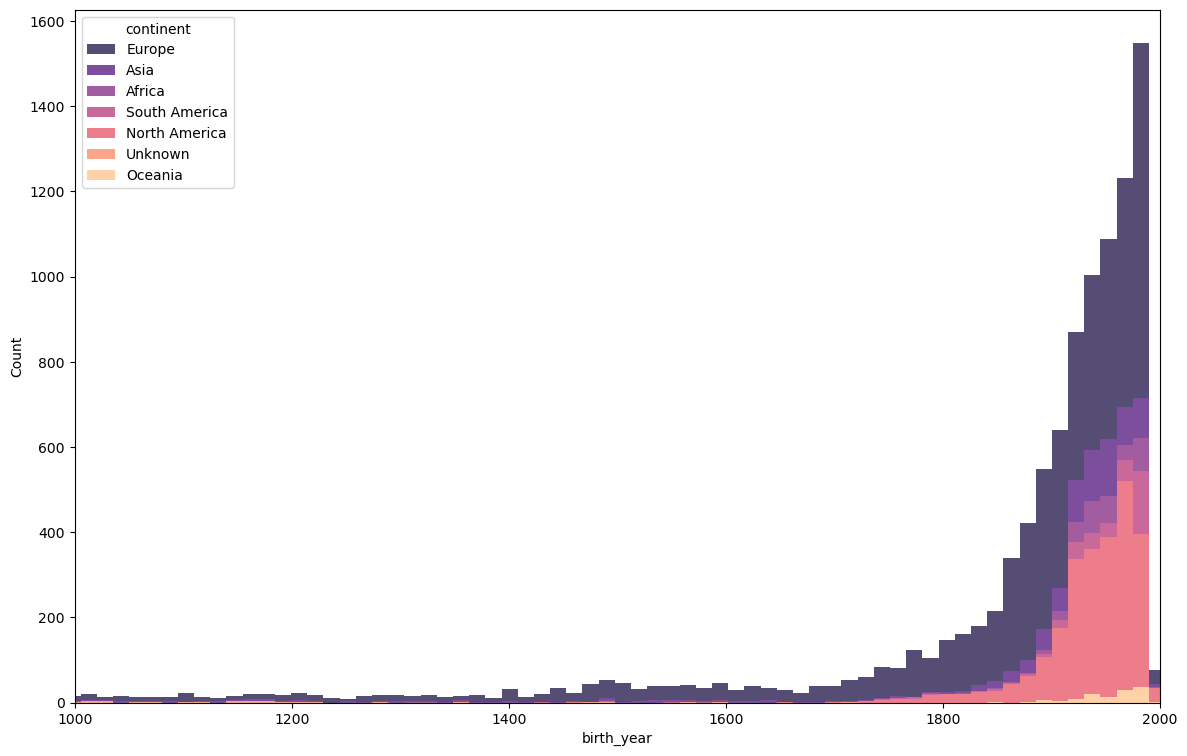

In [20]:
plt.figure(figsize=(14,9))
sns.histplot(data = df,x="birth_year", hue="continent", palette="magma", multiple="stack", linewidth=0)
plt.xlim (1000,2000)

As seen in the graph, our intuition was absolutely correct. Now let's have a look at Industrywise contribution.

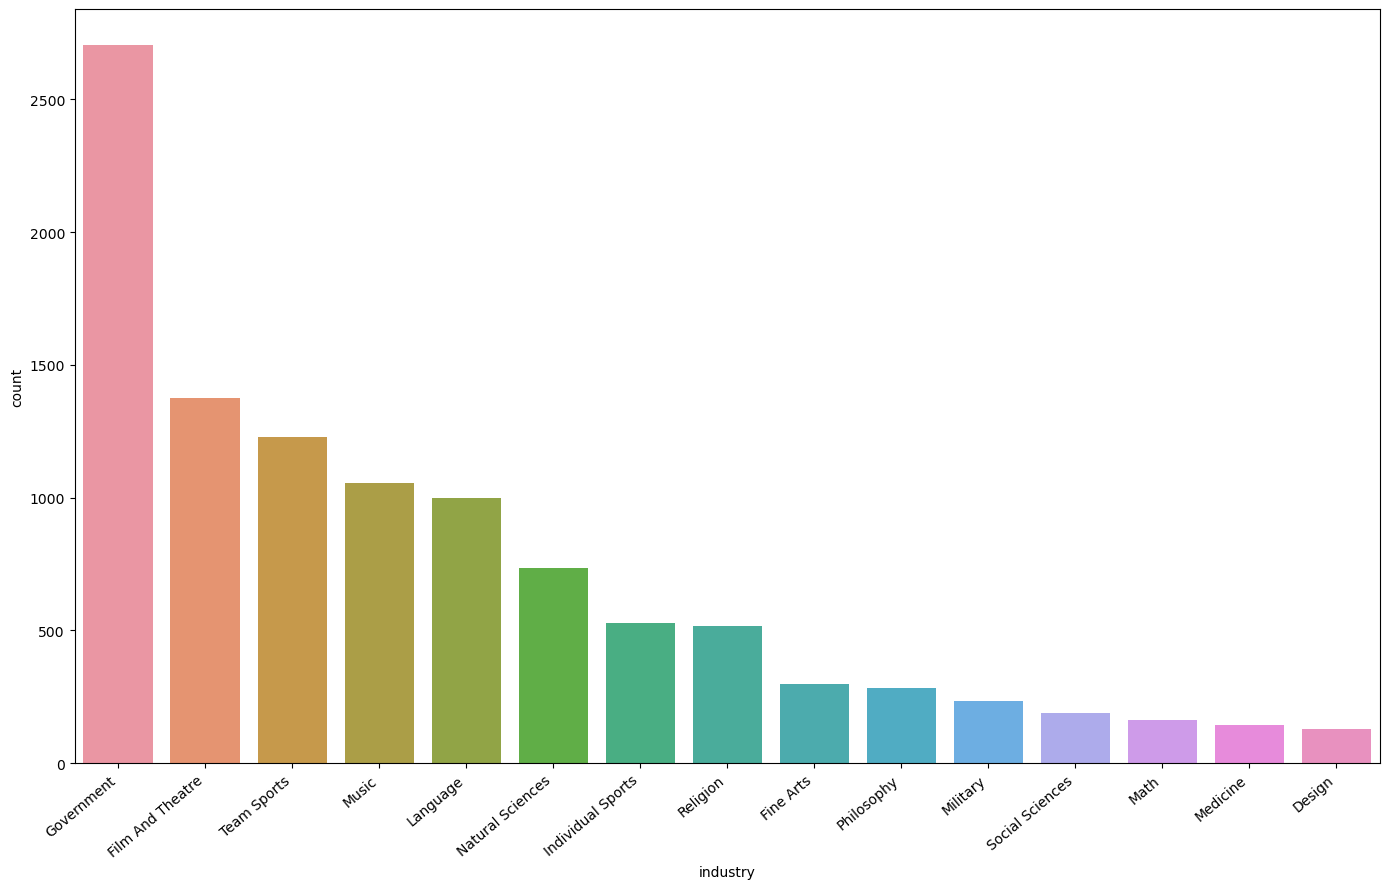

In [21]:
plt.figure(figsize=(14,9))
ax = sns.countplot(x='industry',data=df, order=df.industry.value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Looks like Government posts have quite a good time throughout history. Afterall power is respected everywhere. Now let's see the genderwise contribution.

Male      9846
Female    1495
Name: sex, dtype: int64

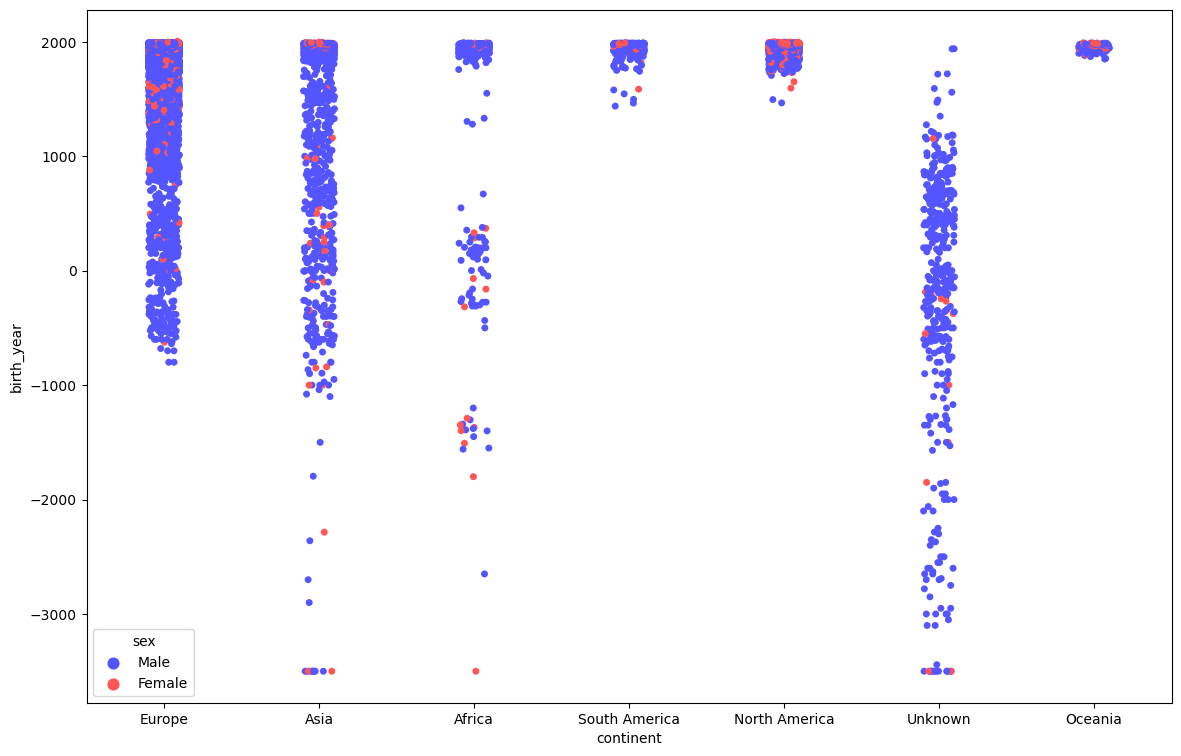

In [22]:
plt.figure(figsize=(14,9))
sns.stripplot(x='continent',y='birth_year',data=df, hue='sex', 
             palette='seismic')
df.sex.value_counts()

The plot suggests that in the dataset, no. of males is significantly higher than no. of females. While (contradictory to popular belief) contribution of females can be seen throught entire timeline except for North America, where it is relatively higher in recent times.
Now let's have a look at top 10 personalities with highest popularity index.

In [23]:
df.sort_values(by=["historical_popularity_index"], ascending=False)
df.iloc[:10,]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384.0,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4.0,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356.0,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
5,18079,Leonardo da Vinci,Male,1452.0,Vinci,NaN,Italy,Europe,43.78333,10.91667,Inventor,Invention,Science & Technology,174,88931135,511098,31.4644
6,5823,Confucius,Male,-551.0,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705
7,15924,Julius Caesar,Male,-100.0,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
8,13633,Homer,Male,-800.0,Smyrna,NaN,Turkey,Europe,38.41861,27.13917,Writer,Language,Humanities,141,20839405,147797,31.1087
9,23275,Pythagoras,Male,-570.0,Samos Island,NaN,Greece,Europe,37.75000,26.83333,Philosopher,Philosophy,Humanities,114,26168219,229546,31.0691


9/10 people in above list is from B.C., that suggests that though there are less people from Early Classical and Iron age, but their influence on mankind (displayed via historical popularity index) is generally much higher.

# Era wise distribution

* The Bronze Age (3000 B.C. to 1300 B.C.)
* The Iron Age (1300 B.C. to 600 B.C.)
* Classical Era (600 B.C.-A.D. 476)
* The Middle Ages (A.D. 476 -A.D. 1450 )
* Early Modern Era (A.D. 1450-A.D. 1750)
* Age of Discovery (or Exploration) (Europe, 1400CE–1700CE)
* The Renaissance (1350s–1650s)
* The Enlightenment (1650s–1780s) 
* The Scientific Revolution (1640 – 18th Century)
* Age of Revolution (1750–1917) 
* The Romantic Era (1790s–1850s)
* Information Age (1971–present)
* Industrial Revolution (1750s–1900)

* PreHistoric Era (-3000 to -1300 & -1300 to 476)
* Classical Era(-600 to 476)
* Medievel Era (476 to 1450)
* Early Modern Era (1450 - 1750) {includes Age of Discovery(1400-1700), The Renaissance (1350-1650), The Enlightment(1650-1780), Scientific Revolution(1640-1750) }
* Era of Revolutions(1750 - 1945) {includes 2 world wars and romantic era(1790-1850)}
* Information Era(1945-end)

# And Now the Prehistoric Era (Bronze and Iron ages) begins

The Bronze age existed from 3000 BC to 1300 BC while the iron age lasted from 1300 BC to 600 BC. This was the time for early empires like persia, Greece and Egypt. During these era, Rulers, Priests and Philosophers  were the leading figures. Now let's see this in Visualization.

In [24]:
df_prehistoric = df.loc[df['birth_year'] < -600]
df_prehistoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 8 to 7321
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   186 non-null    int64  
 1   full_name                    186 non-null    object 
 2   sex                          186 non-null    object 
 3   birth_year                   186 non-null    float64
 4   city                         186 non-null    object 
 5   state                        1 non-null      object 
 6   country                      186 non-null    object 
 7   continent                    181 non-null    object 
 8   latitude                     40 non-null     float64
 9   longitude                    40 non-null     float64
 10  occupation                   186 non-null    object 
 11  industry                     186 non-null    object 
 12  domain                       186 non-null    object 
 13  article_languages  

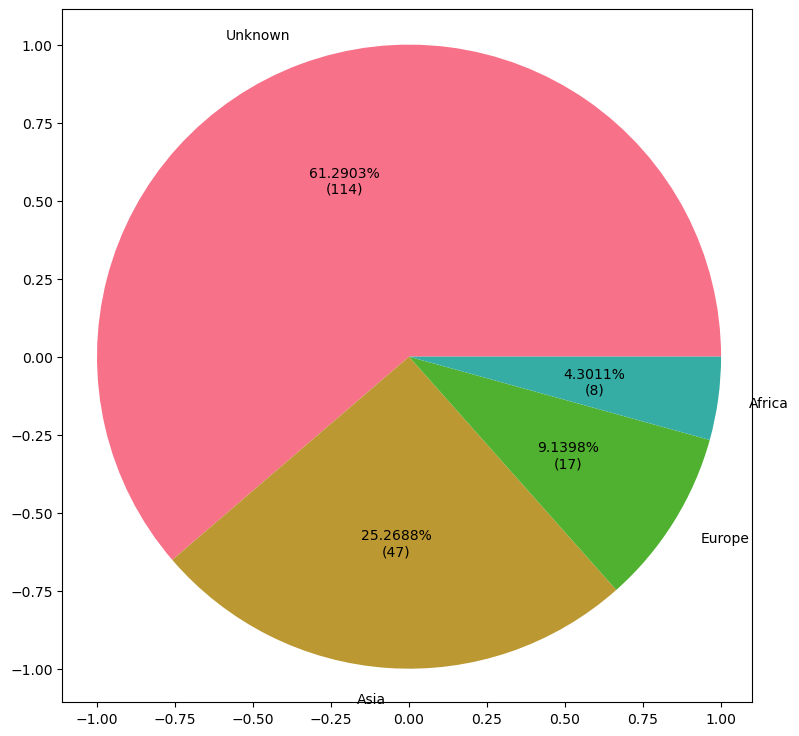

<AxesSubplot:xlabel='continent', ylabel='count'>

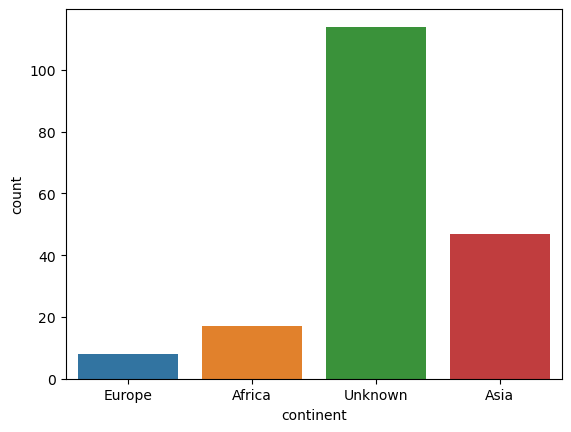

In [25]:
df['continent'].fillna('Unknown',inplace=True)
df_prehistoric = df.loc[df['birth_year'] < -600]
df_prehistoric.dropna()

def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, len(df_prehistoric.axes[0])*x/100)

plt.figure(figsize=(14,9))
data = df_prehistoric.continent.value_counts()
# labels = df_prehistoric.continent.unique()
labels = ['Unknown', 'Asia', 'Europe', 'Africa',]
colors = sns.color_palette('husl')
plt.pie(data, labels=labels,colors = colors, autopct = my_fmt, frame=True)
plt.show()
sns.countplot(x='continent',data=df_prehistoric)

We are seeing that, most of the data from Prehistoric Era belongs to Unknown continent. This was the time when the known world existed only in Persia, Indus valley, Masopotaemia, Greece and Egypt. And our graphs conforms this by indicating that there are only 3 continets's data is avaliable, and a vast data doesn't have specified continent.

You must be curious that what were the domains and sectors in this time except war and rituals. Then let's find out

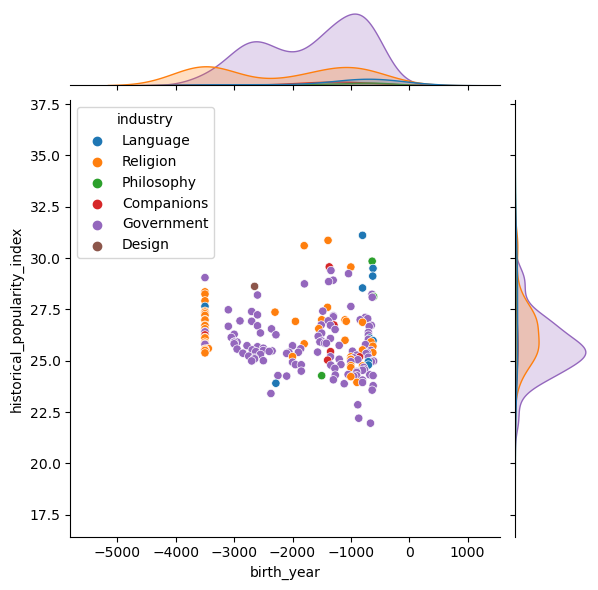

In [26]:
sns.jointplot(x='birth_year', y='historical_popularity_index', data=df_prehistoric, hue="industry")

As we can see, only 7 types of industries were avalible during Prehistoric Era. Mostly great figures of this Era were from Governments (kings and emperors) and Religion (priests). Now, you must be wondering that what does Companions mean here, why not find it ourselves

In [27]:
df_prehistoric.loc[df['industry'] == "Companions"]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
50,90050,Nefertiti,Female,-1370.0,Thebes,NaN,Egypt,Africa,25.72056,32.61028,Companion,Companions,Public Figure,74,9660479,130547,29.5711
585,156607,Nefertari,Female,-1290.0,Other,NaN,Egypt,Africa,NaN,NaN,Companion,Companions,Public Figure,33,1855245,56220,26.7417
843,315859,Bathsheba,Female,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Companion,Companions,Public Figure,30,2403788,80126,26.2581
1593,809990,Ankhesenpaaten,Female,-1348.0,Thebes,NaN,Egypt,Africa,25.72056,32.61028,Companion,Companions,Public Figure,31,1021436,32950,25.4449
1904,396431,Athaliah,Female,-850.0,Samaria,NaN,Israel,Asia,32.14306,35.26062,Companion,Companions,Public Figure,28,458251,16366,25.1903
2133,156602,Tiye,Female,-1398.0,Sohag,NaN,Egypt,Africa,26.56667,31.75000,Companion,Companions,Public Figure,27,587173,21747,25.0300


Probably most of you may still be confused after reading about "Companions", but allow me to help you. These all were the great queens of Prehistoric Era. At that time, queens were considered companions to kings and used to aid them in governance.

So now we have learnt a lot about The Prehistoric Era, now lets check if there were any countries in existance at the time.

<AxesSubplot:xlabel='country', ylabel='count'>

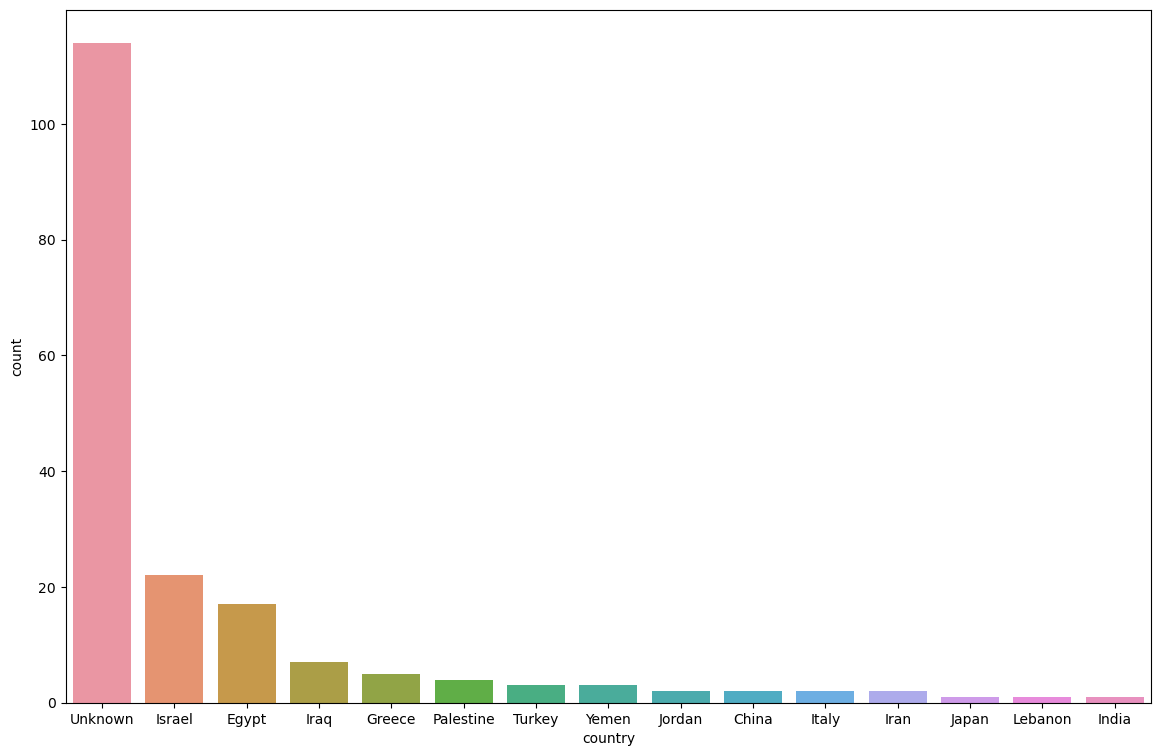

In [28]:
plt.figure(figsize=(14,9))
sns.countplot(x='country',data=df_prehistoric, order=df_prehistoric.country.value_counts().iloc[:16].index)

Wonderful, we have data from 14 different countries during PreHistoric Era. Now let's see genderwise contribution. 

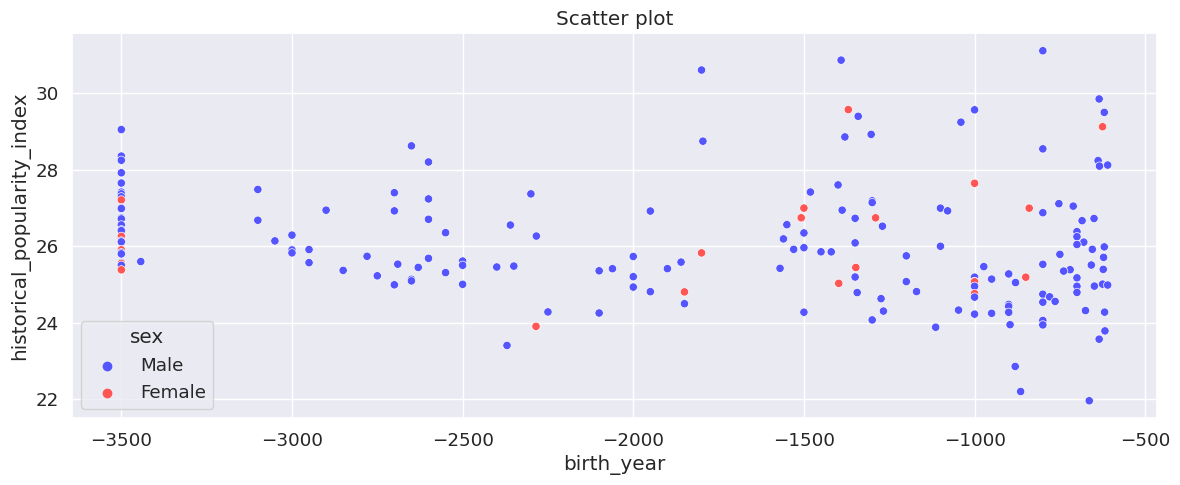

Male      166
Female     20
Name: sex, dtype: int64

In [29]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_prehistoric,
                x="birth_year",
                y="historical_popularity_index",
                hue="sex",
                palette='seismic'
               )

plt.title("Scatter plot")
plt.show()
df_prehistoric.sex.value_counts()

The data displays the gender contribution ratio of almost 1/8, which is lower that ratio of General data. In the above plot, the line at 3500 B.C. seems strange, we saw same straight line in joint plant earlier too. Let's see what it is made of  

In [30]:
df_prehistoric.loc[df["birth_year"]==-3500]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
84,13151,Gilgamesh,Male,-3500.0,Other,NaN,Iraq,Asia,NaN,NaN,Politician,Government,Institutions,54,9602219,177819,29.0492
140,15192,Isaac,Male,-3500.0,Canaan,NaN,Israel,Asia,NaN,NaN,Religious Figure,Religion,Institutions,62,4778973,77080,28.3556
159,9840,Elijah,Male,-3500.0,Tishbe,Gilead,Jordan,Asia,NaN,NaN,Religious Figure,Religion,Institutions,55,5685950,103381,28.2463
211,53617,Methuselah,Male,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,39,5031601,129015,27.9189
264,80047,Diogenes Laertius,Male,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Writer,Language,Humanities,41,1103296,26910,27.6511
334,173688,Enoch,Male,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,36,1150313,31953,27.4143
350,222788,Ishmael,Male,-3500.0,Canaan,NaN,Israel,Asia,NaN,NaN,Religious Figure,Religion,Institutions,40,4670474,116762,27.3675
376,16479,Japheth,Male,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,38,1325651,34886,27.2905
406,20314501,Rachel,Female,-3500.0,Paddan Aram,NaN,Iraq,Asia,NaN,NaN,Religious Figure,Religion,Institutions,36,2962282,82286,27.2099
482,350589,Lot,Male,-3500.0,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,44,1093210,24846,27.0033


Looks like dataset creators gave 3500 BC birthyear to all with no proper birth info. Most of people are religious icons, some considered demigod too.

Thus our time at the PreHistoric Era comes to an end here. We saw how being a priest or ruler was the most powerful positions in this time, how old the concepts like philosopy and sports are and how some great queens during this time used to rule the most early empires of mankind. Now let's enter the Classical Era. 

# The Classical Era begins

While PreHistoric Era is considered the Era of Gods, due to time of great religious leaders; Classical Era is called "The Age of Heroes". This was the time when great heroes like Caesar, Alexander and Leonidas (of Sparta) used to roam on Earth. Classical Era also gave us great philosophers like Plato & Socrates as well as great scientists and Mathamaticians like Euclid and Archemedes.

First as always, lets check from where these great entities belonged.

In [31]:
df_classical_temp = df.loc[df['birth_year'] < 476]
df_classical = df_classical_temp.loc[df['birth_year']>-600]
df_classical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 11315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   653 non-null    int64  
 1   full_name                    653 non-null    object 
 2   sex                          653 non-null    object 
 3   birth_year                   653 non-null    float64
 4   city                         653 non-null    object 
 5   state                        8 non-null      object 
 6   country                      653 non-null    object 
 7   continent                    653 non-null    object 
 8   latitude                     400 non-null    float64
 9   longitude                    400 non-null    float64
 10  occupation                   653 non-null    object 
 11  industry                     653 non-null    object 
 12  domain                       653 non-null    object 
 13  article_languages 

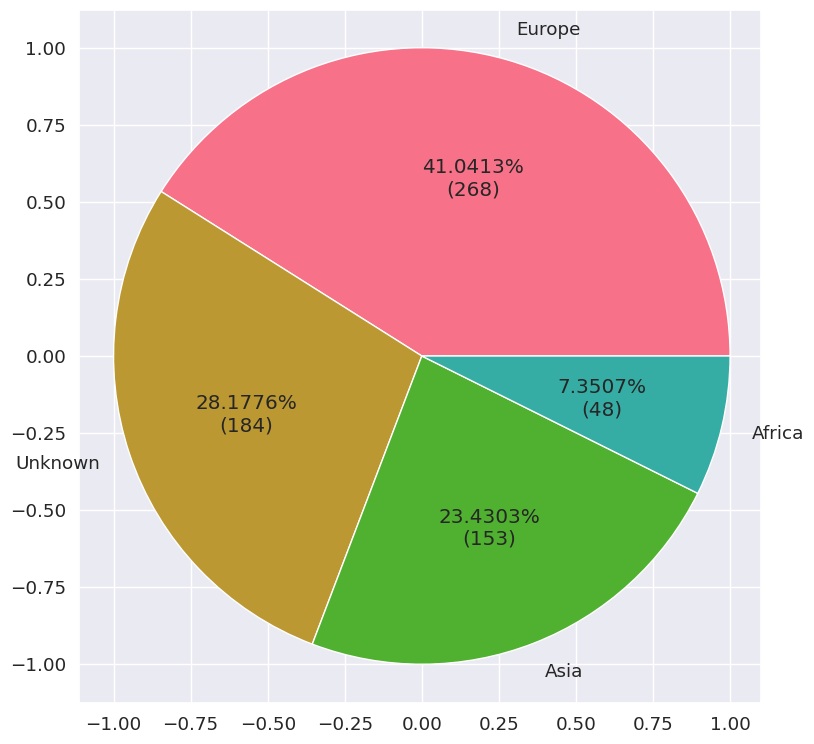

<AxesSubplot:xlabel='continent', ylabel='count'>

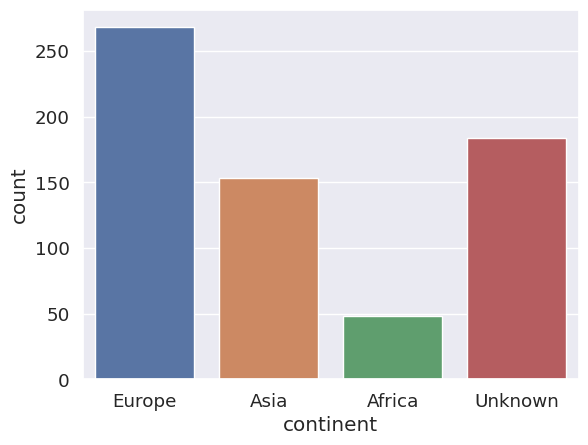

In [32]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, len(df_classical.axes[0])*x/100)

plt.figure(figsize=(14,9))
data = df_classical.continent.value_counts()
# labels = df_prehistoric.continent.unique()
labels = ['Europe', 'Unknown', 'Asia', 'Africa',]
colors = sns.color_palette('husl')
plt.pie(data, labels=labels,colors = colors, autopct = my_fmt, frame=True)
plt.show()
sns.countplot(x='continent',data=df_classical)

Again same 3 continents only; as other continents weren't discovered before the age of discovery. But this time Europe is leading, followed by Asia. Still 28% of people's continent is Unknown. It is worth mentioning that paper was discovered in 150 CE, so most of Unknown people should be before that. Let's check it out.

In [33]:
df_classical.loc[(df_classical['birth_year'] < 150) & (df_classical['continent']=="Unknown")]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
34,9331,Euclid,Male,-325.0,Other,NaN,Unknown,Unknown,NaN,NaN,Mathematician,Math,Science & Technology,117,10896731,93134,29.8846
105,59172,Judas Iscariot,Male,-1.0,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,63,11142102,176859,28.7693
214,69804,Phidias,Male,-490.0,Other,NaN,Unknown,Unknown,NaN,NaN,Sculptor,Fine Arts,Arts,47,2664469,56691,27.8852
250,32794,Marcus Vitruvius Pollio,Male,-80.0,Other,NaN,Unknown,Unknown,41.26667,13.61667,Architect,Design,Arts,53,3436829,64846,27.7414
252,32802,Vercingetorix,Male,-82.0,Other,NaN,Unknown,Unknown,NaN,NaN,Military Personnel,Military,Institutions,45,3578372,79519,27.7226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,160707,Arsaces I of Parthia,Male,-280.0,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,26,163193,6277,23.7464
4782,92232,Diodotus Tryphon,Male,-160.0,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,27,109734,4064,23.5294
5013,92230,Antiochus VI Dionysus,Male,-148.0,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,26,123386,4746,23.4021
5675,284561,Megasthenes,Male,-350.0,Other,NaN,Unknown,Unknown,NaN,NaN,Diplomat,Government,Institutions,27,299694,11100,23.0265


As we speculated, out of almost 180 people with Unknown continet, 120 were born before 150 CE (before invention of paper). This small observation help us to truely understand the importance of paper. Without it, the documentation would be almost impossible and a lot of precious knowledge would have been lost.

Anyway, lets continue our analysis, now lets check domains and industries.

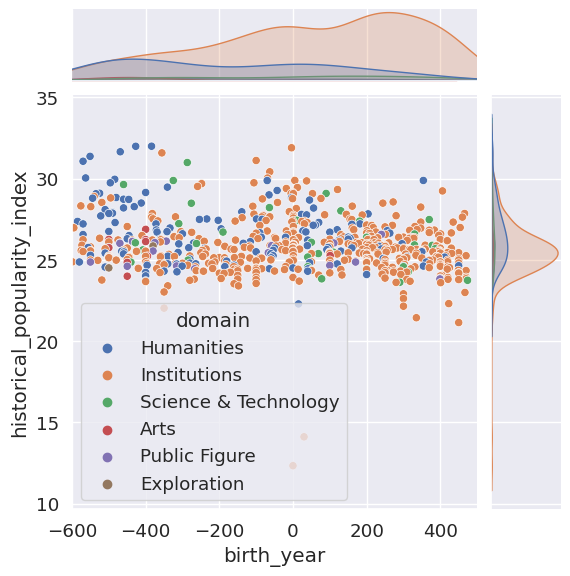

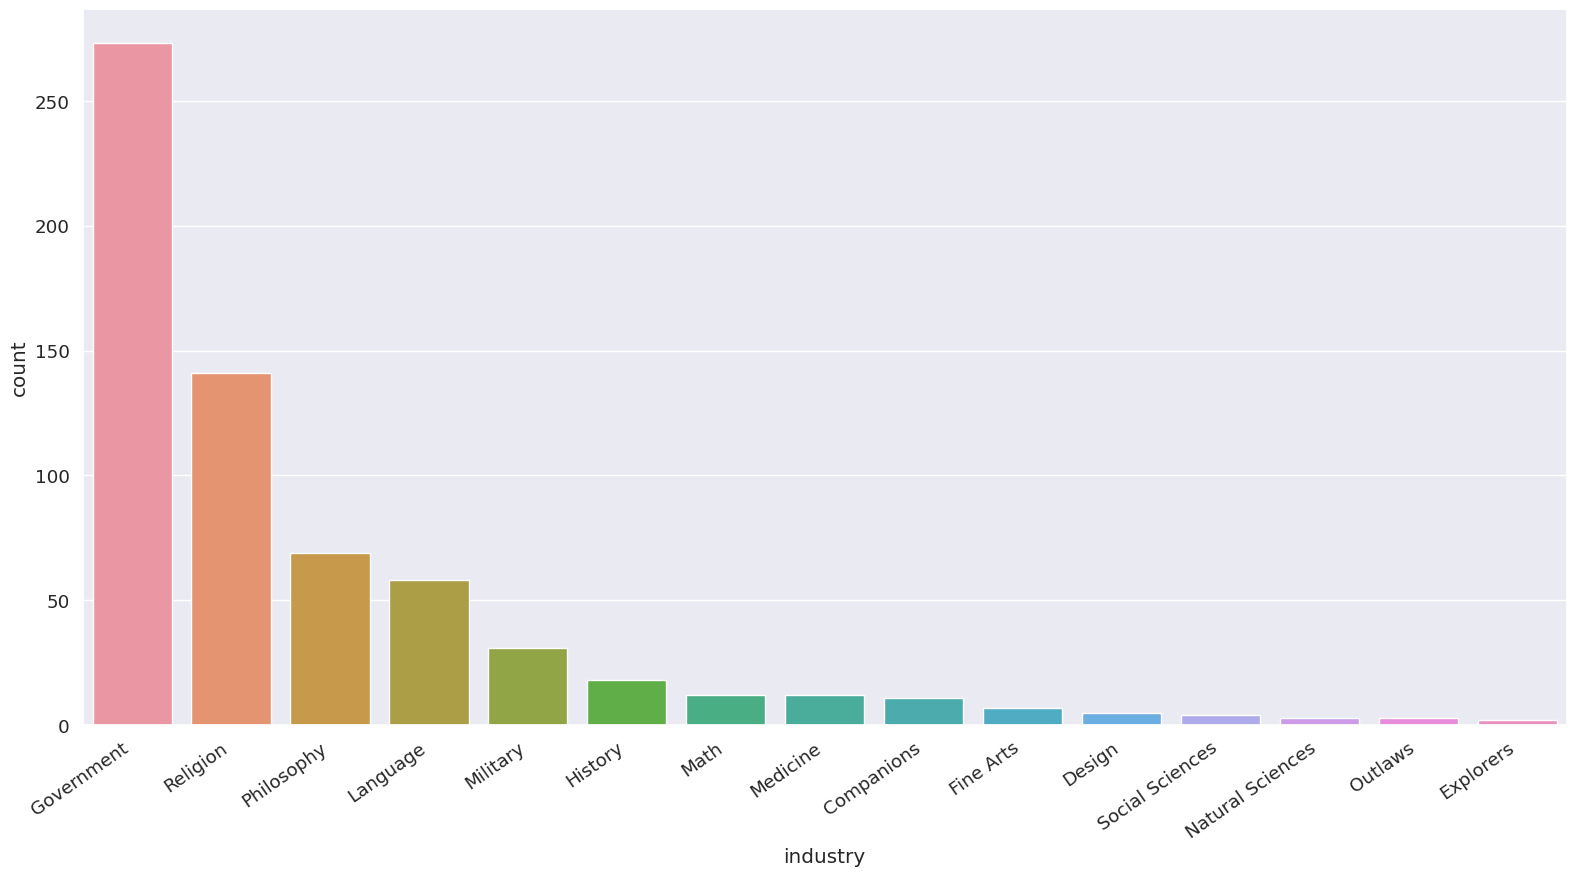

In [34]:
sns.jointplot(x='birth_year', y='historical_popularity_index', data=df_classical, hue="domain", xlim=[-600,500])

plt.figure(figsize=(16,9))
ax1=sns.countplot(x = 'industry', data = df_classical, order=df_classical.industry.value_counts().iloc[:15].index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.tight_layout()
plt.show()

The evergreen sector of Government is again leading, I doubt it will ever leave the crown of 1st position. The domination of Religion is still strong. But notably Philosophy, Language and Math has gained a lot of popularity. These branches are going to guide us towards next Eras. Notably we are seeing  Explorers and Language as other popular sectors, which means different civillizations has now statred to connect with each other and historic routes like silk-road has developed.

One interesting thing we can see in the joint plot is that *Arts* domain is more concentrated during 500 BC to 400 BC. What could be the reason, let's try to find out

In [35]:
df_classical.loc[df_classical['domain'] == "Arts"]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
214,69804,Phidias,Male,-490.0,Other,NaN,Unknown,Unknown,NaN,NaN,Sculptor,Fine Arts,Arts,47,2664469,56691,27.8852
250,32794,Marcus Vitruvius Pollio,Male,-80.0,Other,NaN,Unknown,Unknown,41.26667,13.61667,Architect,Design,Arts,53,3436829,64846,27.7414
529,79994,Praxiteles,Male,-400.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Sculptor,Fine Arts,Arts,39,1323351,33932,26.8778
842,186948,Polykleitos,Male,-500.0,Argos,NaN,Greece,Europe,37.61667,22.71667,Sculptor,Fine Arts,Arts,31,1205874,38899,26.2605
852,657094,Lysippos,Male,-400.0,Sicyon,NaN,Greece,Europe,37.98410,22.71115,Sculptor,Fine Arts,Arts,33,777728,23568,26.2478
950,187245,Apelles,Male,-400.0,Colophon,NaN,Turkey,Asia,NaN,NaN,Painter,Fine Arts,Arts,35,672416,19212,26.1278
1250,82512,Myron,Male,-500.0,Eleutherae,NaN,Greece,Europe,38.17944,23.37583,Sculptor,Fine Arts,Arts,34,766002,22529,25.7509
1807,1568634,Apollodorus of Damascus,Male,101.0,Damascus,NaN,Syria,Asia,33.50000,36.30000,Architect,Design,Arts,36,402541,11182,25.2667
1851,658716,Scopas,Male,-395.0,Paros,NaN,Greece,Europe,37.08333,25.15000,Sculptor,Fine Arts,Arts,27,440261,16306,25.2361
1952,82754,Hippodamus of Miletus,Male,-498.0,Miletus,NaN,Turkey,Asia,37.53028,27.27833,Architect,Design,Arts,27,394534,14612,25.1523


Looks like Art domain in Classical Era is dominated by a lot of Greek Artists. But then why this specific time. Well I don't know that much about Greek City States, but they lasted from around 800 BC to 480 BC. I guess their destruction should be a reason of less artists after 400 BC.

That Reminds me that in my childhood I was very passionate about this Era's Empires. If I recall correctly, the leading Empires of Classical Era were Rome, Persia, Gupta and Han. Let's try to find them in our data, just for the nostalgia.

In [36]:
df_classical.loc[(df_classical['country'] == "Italy") | (df_classical['country'] == "India") | (df_classical['country'] == "Iran") | (df_classical['country'] == "China") | (df_classical['country'] == "Greece")]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384.0,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
3,25664190,Socrates,Male,-469.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356.0,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
6,5823,Confucius,Male,-551.0,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,175827,Cincinnatus,Male,-519.0,Roman Republic,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,26,1428781,54953,23.7614
4449,234074,Valmiki,Male,-400.0,India,NaN,India,Asia,NaN,NaN,Writer,Language,Humanities,32,1116596,34894,23.7111
5006,187726,Chandragupta Maurya,Male,-340.0,Bihar,NaN,India,Asia,NaN,NaN,Politician,Government,Institutions,43,2596920,60393,23.4046
7800,258669,Samudragupta,Male,335.0,Other,NaN,India,Asia,NaN,NaN,Politician,Government,Institutions,26,337274,12972,21.4415


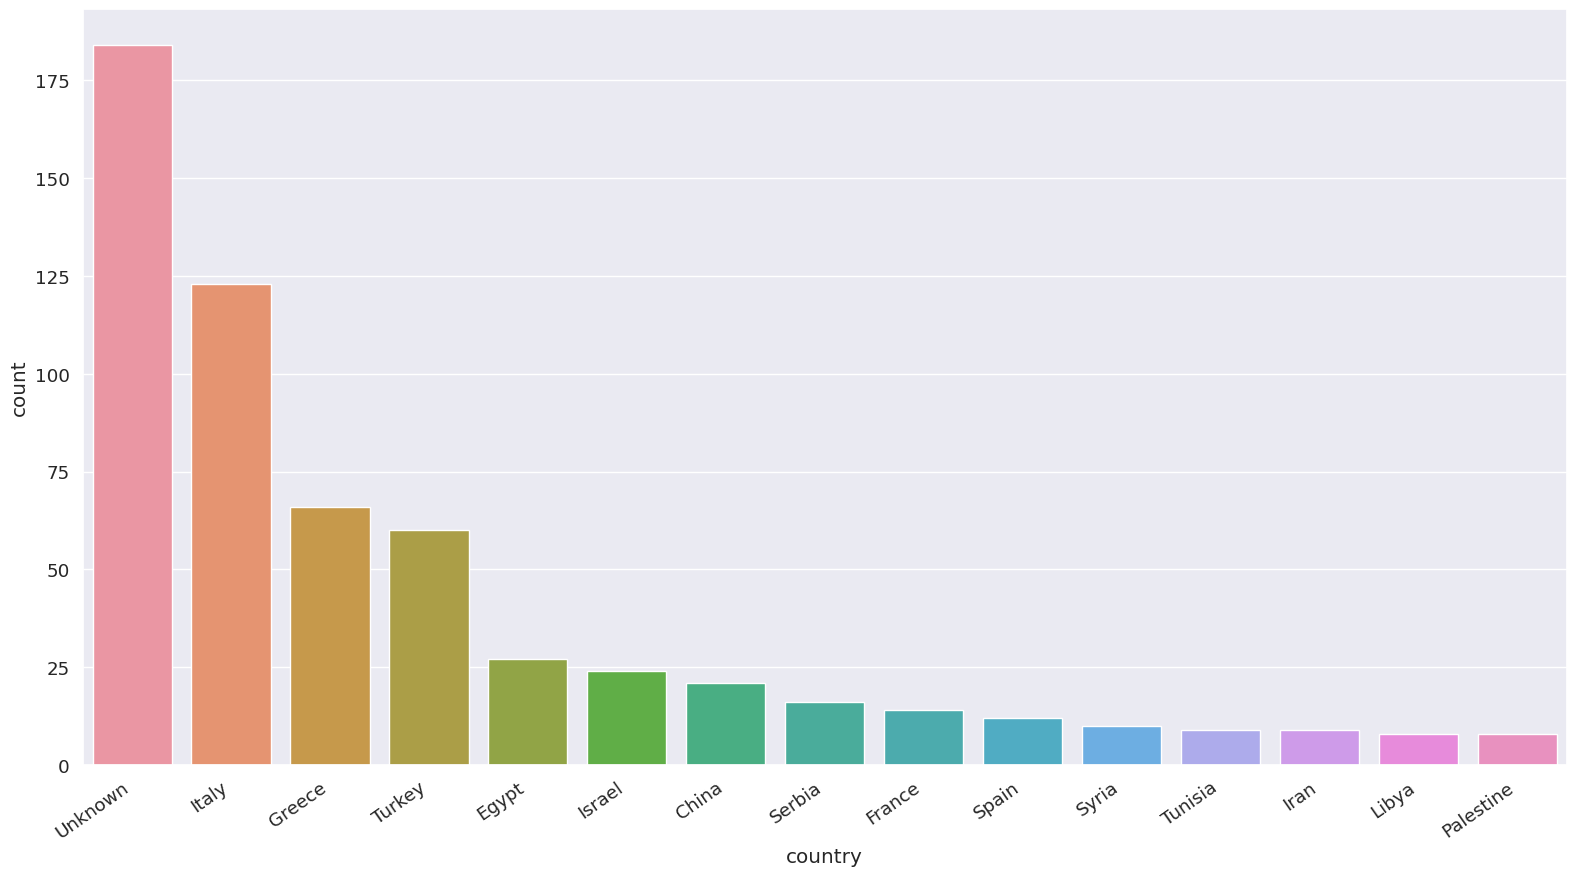

In [37]:
plt.figure(figsize=(16,9))
ax1=sns.countplot(x = 'country', data = df_classical, order=df_classical.country.value_counts().iloc[:15].index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.tight_layout()
plt.show()

Would you look at that, 4 Empires and Greek City States together holds more than 50% of Classical Era's leading figures. Well currently most descendents eg. Iran, Greece and Italy are far from Domaniation in any sector. Time changes everything.

Anyway, now let's continue our jorney by looking at most popular figures of Classical Era. This time let's use page_views for that.

In [38]:
df_classical.sort_values(by=["page_views"], ascending=False).iloc[:10]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
2,1095706,Jesus Christ,Male,-4.0,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
0,308,Aristotle,Male,-384.0,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
4,783,Alexander the Great,Male,-356.0,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
1,22954,Plato,Male,-427.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
7,15924,Julius Caesar,Male,-100.0,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
3,25664190,Socrates,Male,-469.0,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
149,18993992,Spartacus,Male,-109.0,Thrace,NaN,Bulgaria,Europe,NaN,NaN,Military Personnel,Military,Institutions,64,29683994,463812,28.2996
9,23275,Pythagoras,Male,-570.0,Samos Island,NaN,Greece,Europe,37.75000,26.83333,Philosopher,Philosophy,Humanities,114,26168219,229546,31.0691
27,3395,Gautama Buddha,Male,-563.0,Lumbini,NaN,Nepal,Asia,27.53333,83.05000,Philosopher,Philosophy,Humanities,124,23685332,191011,30.0418
6,5823,Confucius,Male,-551.0,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705


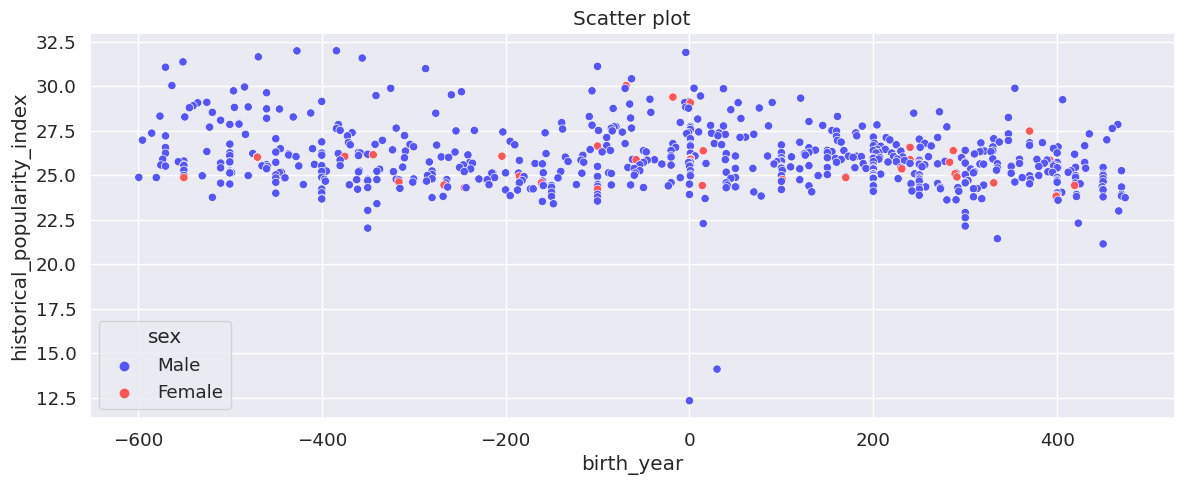

Male      619
Female     34
Name: sex, dtype: int64

In [39]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_classical,
                x="birth_year",
                y="historical_popularity_index",
                hue="sex",
                palette='seismic'
               )

plt.title("Scatter plot")
plt.show()
df_classical.sex.value_counts()

In [40]:
#Treemap, fix comments, and check NaN & Unknown